# Foraging toolkit demo - follower birds

## Outline
* [Introduction](##introduction)
* [Simulation](#simulation)
* [Derived quantities](#derived-quantities)
* [Inference](#inference)

## Introduction

In this notebook we use the foraging toolkit to simulate agents that move toward other agents. 

The users are advised to familiarize themselves first with the `random_foragers.ipynb` demo, which contains a detailed explanation of the various commands and methods used in this notebook.

The follower behavior is in contrast to _hungry agents_, who care only about food location (see the `hungry_foragers.ipynb` demo notebook).

The main reference is [1], in particular Fig.2.

---

[1] R. Urbaniak, M. Xie, and E. Mackevicius, “Linking cognitive strategy, neural mechanism, and movement statistics in group foraging behaviors,” Sci Rep, vol. 14, no. 1, p. 21770, Sep. 2024, [doi: 10.1038/s41598-024-71931-0.](https://www.nature.com/articles/s41598-024-71931-0)

In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import dill
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio

pio.renderers.default = "notebook"

import collab.foraging.toolkit as ft
from collab.foraging import random_hungry_followers as rhf

logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub,
# to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000

notebook_starts = time.time()

## Simulation


**Simulation of follower foragers**

- **Initialization**
    - Initialize the grid with a specified grid size
    - Randomly place `num_rewards` rewards
    - Normalize the probabilities for forager step size
- **Forward Simulation**
    - For each frame:
        - Update visibility for foragers
        - Compute proximity scores for all foragers, with local maxima at other foragers' locations and exponential decay.
        - For each forager:
            - Weight proximity scores with the forager's visibility scores
            - Sort accessible points by the above weighted score
            - Move forager to a randomly chosen position from among top 10 ranking points above

- **Update Rewards**
    - At each frame, remove a reward if a forager is next to it, starting from that frame onward.


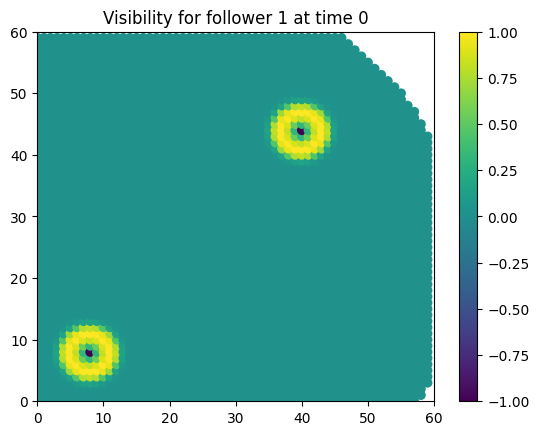

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
308    5   8  20.518285          14          15    0.754291        1     1   
491    8  11  16.278821          11          12    0.842850        1     1   
2441  40  41  27.658633          21          18    0.569032        1     1   
485    8   5  21.095023          11          18    0.740921        1     1   
668   11   8  17.000000           8          15    0.829038        1     1   
2264  37  44  27.658633          18          21    0.569032        1     1   
2624  43  44  31.890437          24          21    0.441805        1     1   
2447  40  47  31.890437          21          24    0.441805        1     1   
667   11   7  17.888544           8          16    0.811298        1     1   
2623  43  43  31.240999          24          20    0.462027        1     1   

      proximity  proximity_standardized  
308    1.000000                6.111881  
491    1.000000                6.111881  
2441   

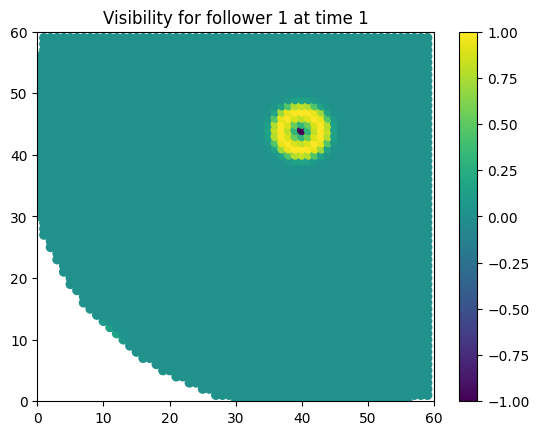

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2116  40  41  3.605551         3.0         2.0    0.992090        1     2   
1939  37  44  6.082763         6.0         1.0    0.977543        1     2   
2299  43  44  1.000000         0.0         1.0    0.999391        1     2   
2122  40  47  5.000000         3.0         4.0    0.984808        1     2   
2056  39  41  4.472136         4.0         2.0    0.987840        1     2   
2062  39  47  5.656854         4.0         4.0    0.980568        1     2   
1940  37  45  6.324555         6.0         2.0    0.975729        1     2   
1938  37  43  6.000000         6.0         0.0    0.978148        1     2   
2176  41  41  2.828427         2.0         2.0    0.995130        1     2   
2298  43  43  0.000000         0.0         0.0    1.000000        1     2   

      proximity  proximity_standardized  
2116   1.000000                8.402727  
1939   1.000000                8.402727  
2299   1.000000   

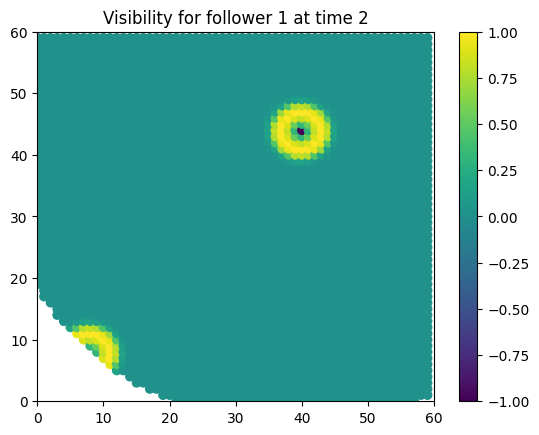

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2096  37  44   3.605551         2.0         3.0    0.992090        1     3   
370    8  11  43.139309        31.0        30.0    0.064905        1     3   
2273  40  41   1.000000         1.0         0.0    0.999391        1     3   
2279  40  47   6.082763         1.0         6.0    0.977543        1     3   
526   11   8  43.278170        28.0        33.0    0.060067        1     3   
2456  43  44   5.000000         4.0         3.0    0.984808        1     3   
2455  43  43   4.472136         4.0         2.0    0.987840        1     3   
319    7  11  43.863424        32.0        30.0    0.039664        1     3   
2339  41  47   6.324555         2.0         6.0    0.975729        1     3   
422    9  11  42.426407        30.0        30.0    0.089715        1     3   

      proximity  proximity_standardized  
2096   1.000000                7.132148  
370    1.000000                7.132148  
2273   

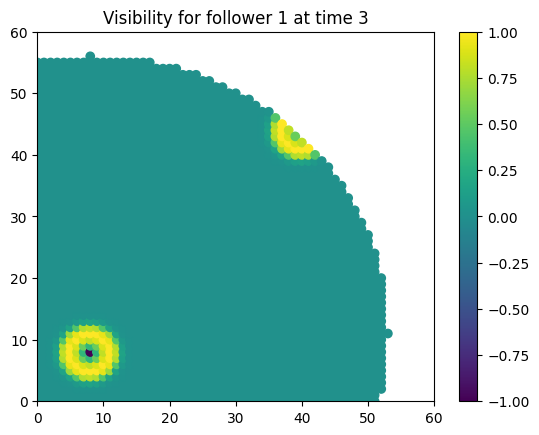

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2171  40  41  43.863424        32.0        30.0    0.039664        1     4   
2039  37  44  43.931765        29.0        33.0    0.037280        1     4   
459    8  11   0.000000         0.0         0.0    1.000000        1     4   
288    5   8   4.242641         3.0         3.0    0.989054        1     4   
453    8   5   6.000000         0.0         6.0    0.978148        1     4   
625   11   8   4.242641         3.0         3.0    0.989054        1     4   
2214  41  41  44.598206        33.0        30.0    0.014025        1     4   
516    9  11   1.000000         1.0         0.0    0.999391        1     4   
626   11   9   3.605551         3.0         2.0    0.992090        1     4   
624   11   7   5.000000         3.0         4.0    0.984808        1     4   

      proximity  proximity_standardized  
2171   1.000000                6.338631  
2039   1.000000                6.338631  
459    

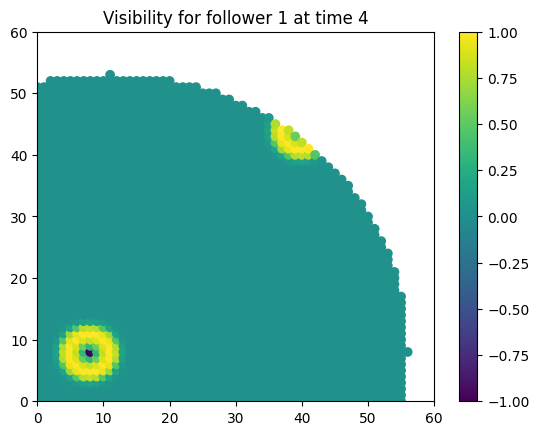

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
427    8   5   4.242641         3.0         3.0    0.989054        1     5   
2082  40  41  43.931765        29.0        33.0    0.037280        1     5   
589   11   8   0.000000         0.0         0.0    1.000000        1     5   
1951  37  44  44.407207        26.0        36.0    0.020691        1     5   
433    8  11   4.242641         3.0         3.0    0.989054        1     5   
271    5   8   6.000000         6.0         0.0    0.978148        1     5   
2125  41  41  44.598206        30.0        33.0    0.014025        1     5   
272    5   9   6.082763         6.0         1.0    0.977543        1     5   
486    9  11   3.605551         2.0         3.0    0.992090        1     5   
380    7  11   5.000000         4.0         3.0    0.984808        1     5   

      proximity  proximity_standardized  
427    1.000000                6.401444  
2082   1.000000                6.401444  
589    

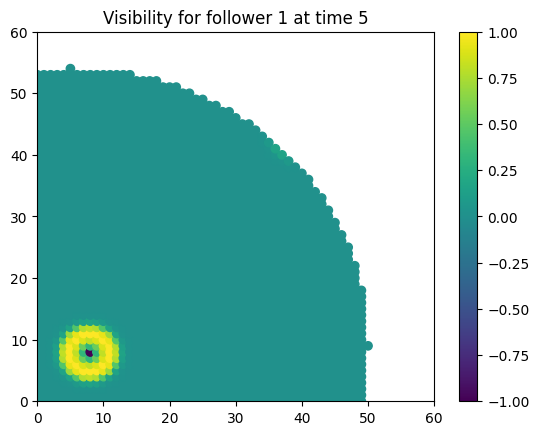

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
438   8   5  5.000000         3.0         4.0    0.984808        1     6   
444   8  11  3.605551         3.0         2.0    0.992090        1     6   
603  11   8  6.082763         6.0         1.0    0.977543        1     6   
278   5   8  1.000000         0.0         1.0    0.999391        1     6   
279   5   9  0.000000         0.0         0.0    1.000000        1     6   
277   5   7  2.000000         0.0         2.0    0.997564        1     6   
498   9  11  4.472136         4.0         2.0    0.987840        1     6   
492   9   5  5.656854         4.0         4.0    0.980568        1     6   
390   7  11  2.828427         2.0         2.0    0.995130        1     6   
384   7   5  4.472136         2.0         4.0    0.987840        1     6   

     proximity  proximity_standardized  
438   1.000000                7.041848  
444   1.000000                7.041848  
603   1.000000                7.

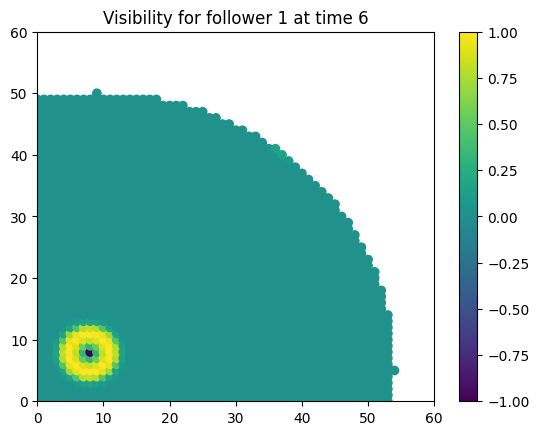

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
411   8  11  6.082763         1.0         6.0    0.977543        1     7   
405   8   5  1.000000         1.0         0.0    0.999391        1     7   
258   5   8  5.000000         4.0         3.0    0.984808        1     7   
559  11   8  3.605551         2.0         3.0    0.992090        1     7   
461   9  11  6.000000         0.0         6.0    0.978148        1     7   
355   7   5  2.000000         2.0         0.0    0.997564        1     7   
361   7  11  6.324555         2.0         6.0    0.975729        1     7   
558  11   7  2.828427         2.0         2.0    0.995130        1     7   
560  11   9  4.472136         2.0         4.0    0.987840        1     7   
455   9   5  0.000000         0.0         0.0    1.000000        1     7   

     proximity  proximity_standardized  
411   1.000000                7.042224  
405   1.000000                7.042224  
258   1.000000                7.

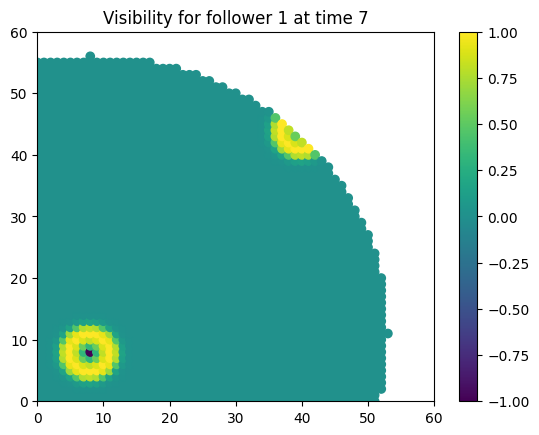

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2171  40  41  43.863424        32.0        30.0    0.039664        1     8   
2039  37  44  43.931765        29.0        33.0    0.037280        1     8   
459    8  11   0.000000         0.0         0.0    1.000000        1     8   
288    5   8   4.242641         3.0         3.0    0.989054        1     8   
453    8   5   6.000000         0.0         6.0    0.978148        1     8   
625   11   8   4.242641         3.0         3.0    0.989054        1     8   
2214  41  41  44.598206        33.0        30.0    0.014025        1     8   
516    9  11   1.000000         1.0         0.0    0.999391        1     8   
626   11   9   3.605551         3.0         2.0    0.992090        1     8   
624   11   7   5.000000         3.0         4.0    0.984808        1     8   

      proximity  proximity_standardized  
2171   1.000000                6.338631  
2039   1.000000                6.338631  
459    

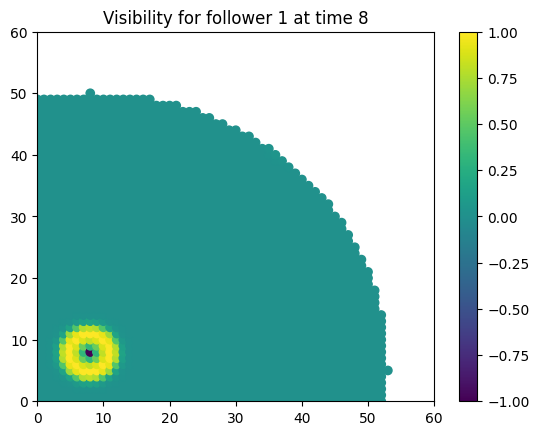

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
258   5   8  4.242641         3.0         3.0    0.989054        1     9   
405   8   5  0.000000         0.0         0.0    1.000000        1     9   
559  11   8  4.242641         3.0         3.0    0.989054        1     9   
411   8  11  6.000000         0.0         6.0    0.978148        1     9   
361   7  11  6.082763         1.0         6.0    0.977543        1     9   
558  11   7  3.605551         3.0         2.0    0.992090        1     9   
257   5   7  3.605551         3.0         2.0    0.992090        1     9   
456   9   5  1.000000         1.0         0.0    0.999391        1     9   
259   5   9  5.000000         3.0         4.0    0.984808        1     9   
462   9  11  6.082763         1.0         6.0    0.977543        1     9   

     proximity  proximity_standardized  
258   1.000000                6.968179  
405   1.000000                6.968179  
559   1.000000                6.

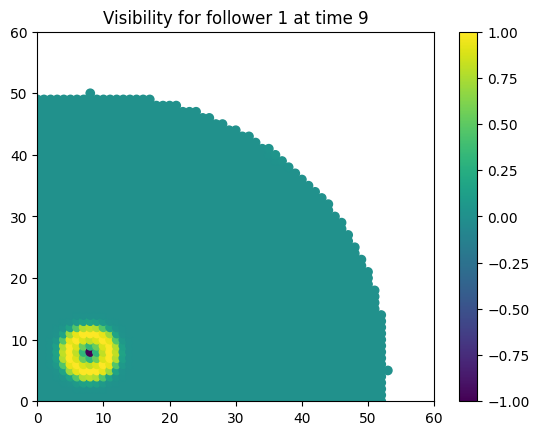

2024-10-29 17:15:27,282 - Generating frame 10/50 


options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
258   5   8  4.242641         3.0         3.0    0.989054        1    10   
405   8   5  0.000000         0.0         0.0    1.000000        1    10   
559  11   8  4.242641         3.0         3.0    0.989054        1    10   
411   8  11  6.000000         0.0         6.0    0.978148        1    10   
361   7  11  6.082763         1.0         6.0    0.977543        1    10   
558  11   7  3.605551         3.0         2.0    0.992090        1    10   
257   5   7  3.605551         3.0         2.0    0.992090        1    10   
456   9   5  1.000000         1.0         0.0    0.999391        1    10   
259   5   9  5.000000         3.0         4.0    0.984808        1    10   
462   9  11  6.082763         1.0         6.0    0.977543        1    10   

     proximity  proximity_standardized  
258   1.000000                6.968179  
405   1.000000                6.968179  
559   1.000000                6.

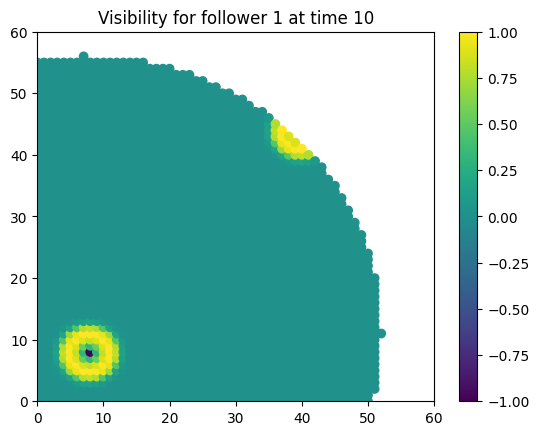

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2158  40  41  44.598206        33.0        30.0    0.014025        1    11   
288    5   8   3.605551         2.0         3.0    0.992090        1    11   
625   11   8   5.000000         4.0         3.0    0.984808        1    11   
2029  37  44  44.598206        30.0        33.0    0.014025        1    11   
454    8   5   6.082763         1.0         6.0    0.977543        1    11   
460    8  11   1.000000         1.0         0.0    0.999391        1    11   
516    9  11   2.000000         2.0         0.0    0.997564        1    11   
2115  39  41  43.863424        32.0        30.0    0.039664        1    11   
287    5   7   4.472136         2.0         4.0    0.987840        1    11   
289    5   9   2.828427         2.0         2.0    0.995130        1    11   

      proximity  proximity_standardized  
2158   1.000000                6.482556  
288    1.000000                6.482556  
625    

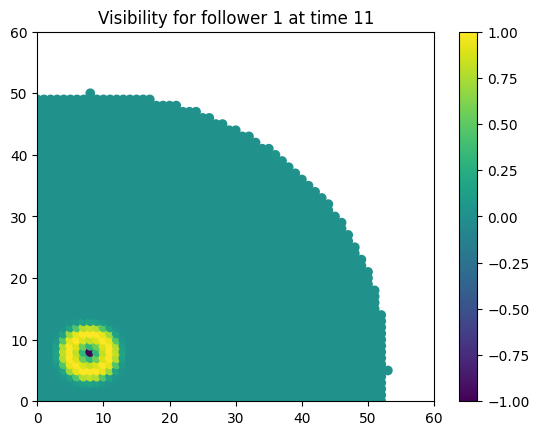

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
258   5   8  4.242641         3.0         3.0    0.989054        1    12   
405   8   5  0.000000         0.0         0.0    1.000000        1    12   
559  11   8  4.242641         3.0         3.0    0.989054        1    12   
411   8  11  6.000000         0.0         6.0    0.978148        1    12   
361   7  11  6.082763         1.0         6.0    0.977543        1    12   
558  11   7  3.605551         3.0         2.0    0.992090        1    12   
257   5   7  3.605551         3.0         2.0    0.992090        1    12   
456   9   5  1.000000         1.0         0.0    0.999391        1    12   
259   5   9  5.000000         3.0         4.0    0.984808        1    12   
462   9  11  6.082763         1.0         6.0    0.977543        1    12   

     proximity  proximity_standardized  
258   1.000000                6.968179  
405   1.000000                6.968179  
559   1.000000                6.

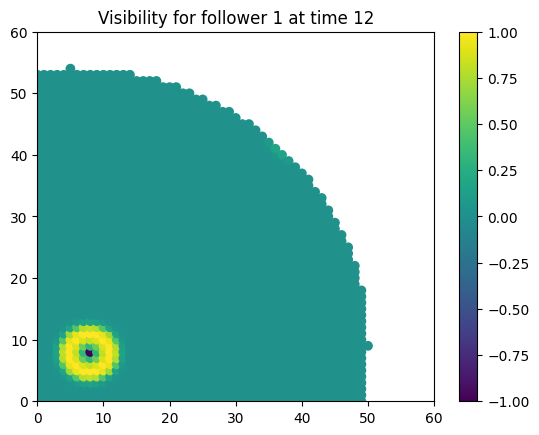

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
438   8   5  5.000000         3.0         4.0    0.984808        1    13   
444   8  11  3.605551         3.0         2.0    0.992090        1    13   
603  11   8  6.082763         6.0         1.0    0.977543        1    13   
278   5   8  1.000000         0.0         1.0    0.999391        1    13   
279   5   9  0.000000         0.0         0.0    1.000000        1    13   
277   5   7  2.000000         0.0         2.0    0.997564        1    13   
498   9  11  4.472136         4.0         2.0    0.987840        1    13   
492   9   5  5.656854         4.0         4.0    0.980568        1    13   
390   7  11  2.828427         2.0         2.0    0.995130        1    13   
384   7   5  4.472136         2.0         4.0    0.987840        1    13   

     proximity  proximity_standardized  
438   1.000000                7.041848  
444   1.000000                7.041848  
603   1.000000                7.

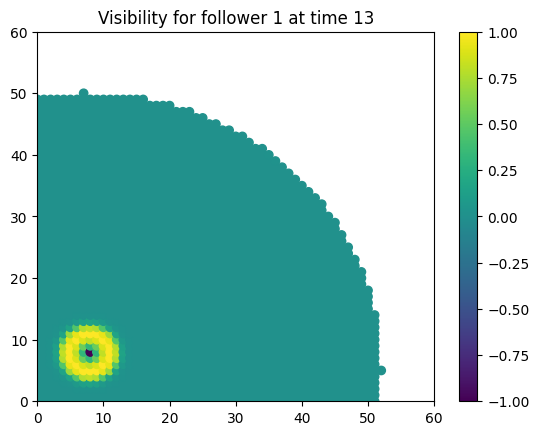

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
406   8   5  1.000000         1.0         0.0    0.999391        1    14   
258   5   8  3.605551         2.0         3.0    0.992090        1    14   
412   8  11  6.082763         1.0         6.0    0.977543        1    14   
559  11   8  5.000000         4.0         3.0    0.984808        1    14   
462   9  11  6.324555         2.0         6.0    0.975729        1    14   
558  11   7  4.472136         4.0         2.0    0.987840        1    14   
257   5   7  2.828427         2.0         2.0    0.995130        1    14   
259   5   9  4.472136         2.0         4.0    0.987840        1    14   
456   9   5  2.000000         2.0         0.0    0.997564        1    14   
560  11   9  5.656854         4.0         4.0    0.980568        1    14   

     proximity  proximity_standardized  
406   1.000000                6.889357  
258   1.000000                6.889357  
412   1.000000                6.

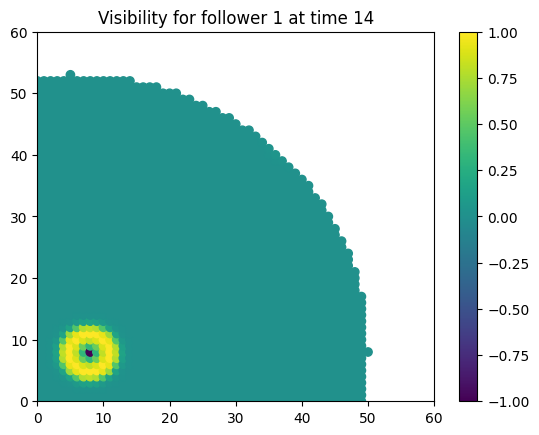

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
592  11   8  6.000000         6.0         0.0    0.978148        1    15   
436   8  11  4.242641         3.0         3.0    0.989054        1    15   
430   8   5  4.242641         3.0         3.0    0.989054        1    15   
273   5   8  0.000000         0.0         0.0    1.000000        1    15   
383   7  11  3.605551         2.0         3.0    0.992090        1    15   
377   7   5  3.605551         2.0         3.0    0.992090        1    15   
591  11   7  6.082763         6.0         1.0    0.977543        1    15   
483   9   5  5.000000         4.0         3.0    0.984808        1    15   
272   5   7  1.000000         0.0         1.0    0.999391        1    15   
274   5   9  1.000000         0.0         1.0    0.999391        1    15   

     proximity  proximity_standardized  
592   1.000000                6.968180  
436   1.000000                6.968180  
430   1.000000                6.

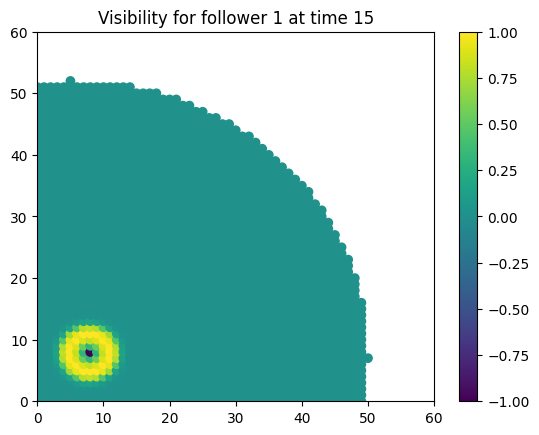

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
428   8  11  5.000000         3.0         4.0    0.984808        1    16   
581  11   8  6.082763         6.0         1.0    0.977543        1    16   
422   8   5  3.605551         3.0         2.0    0.992090        1    16   
268   5   8  1.000000         0.0         1.0    0.999391        1    16   
376   7  11  4.472136         2.0         4.0    0.987840        1    16   
474   9   5  4.472136         4.0         2.0    0.987840        1    16   
580  11   7  6.000000         6.0         0.0    0.978148        1    16   
582  11   9  6.324555         6.0         2.0    0.975729        1    16   
480   9  11  5.656854         4.0         4.0    0.980568        1    16   
269   5   9  2.000000         0.0         2.0    0.997564        1    16   

     proximity  proximity_standardized  
428   1.000000                6.889358  
581   1.000000                6.889358  
422   1.000000                6.

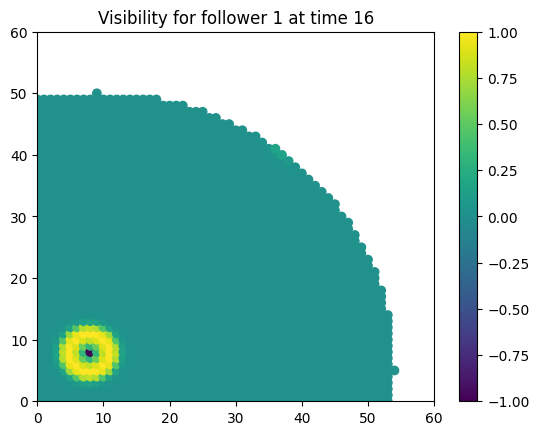

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
411   8  11  6.082763         1.0         6.0    0.977543        1    17   
405   8   5  1.000000         1.0         0.0    0.999391        1    17   
258   5   8  5.000000         4.0         3.0    0.984808        1    17   
559  11   8  3.605551         2.0         3.0    0.992090        1    17   
461   9  11  6.000000         0.0         6.0    0.978148        1    17   
355   7   5  2.000000         2.0         0.0    0.997564        1    17   
361   7  11  6.324555         2.0         6.0    0.975729        1    17   
558  11   7  2.828427         2.0         2.0    0.995130        1    17   
560  11   9  4.472136         2.0         4.0    0.987840        1    17   
455   9   5  0.000000         0.0         0.0    1.000000        1    17   

     proximity  proximity_standardized  
411   1.000000                7.042224  
405   1.000000                7.042224  
258   1.000000                7.

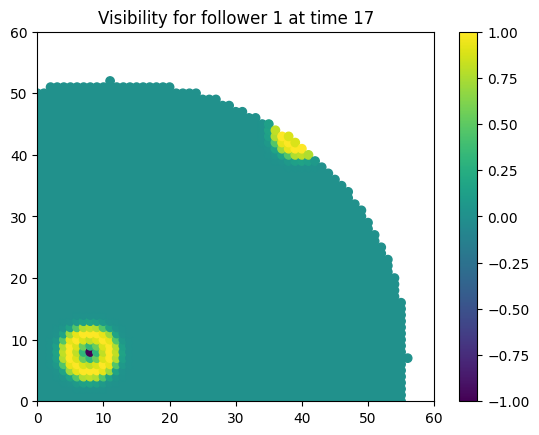

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
419    8   5   3.605551         3.0         2.0    0.992090        1    18   
266    5   8   6.082763         6.0         1.0    0.977543        1    18   
425    8  11   5.000000         3.0         4.0    0.984808        1    18   
2042  40  41  44.687806        29.0        34.0    0.010897        1    18   
578   11   8   1.000000         0.0         1.0    0.999391        1    18   
265    5   7   6.000000         6.0         0.0    0.978148        1    18   
471    9   5   2.828427         2.0         2.0    0.995130        1    18   
477    9  11   4.472136         2.0         4.0    0.987840        1    18   
367    7   5   4.472136         4.0         2.0    0.987840        1    18   
1999  39  41  44.045431        28.0        34.0    0.033315        1    18   

      proximity  proximity_standardized  
419    1.000000                6.574006  
266    1.000000                6.574006  
425    

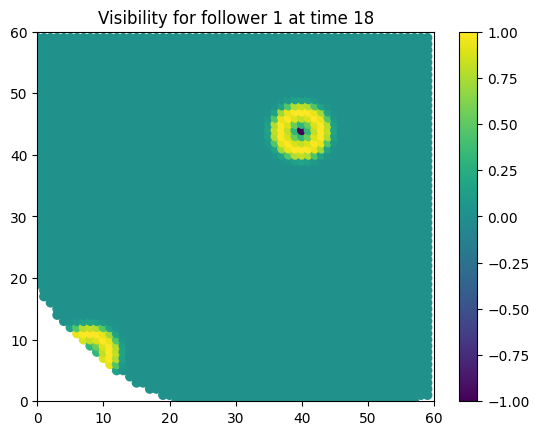

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2096  37  44   3.605551         2.0         3.0    0.992090        1    19   
370    8  11  43.139309        31.0        30.0    0.064905        1    19   
2273  40  41   1.000000         1.0         0.0    0.999391        1    19   
2279  40  47   6.082763         1.0         6.0    0.977543        1    19   
526   11   8  43.278170        28.0        33.0    0.060067        1    19   
2456  43  44   5.000000         4.0         3.0    0.984808        1    19   
2455  43  43   4.472136         4.0         2.0    0.987840        1    19   
319    7  11  43.863424        32.0        30.0    0.039664        1    19   
2339  41  47   6.324555         2.0         6.0    0.975729        1    19   
422    9  11  42.426407        30.0        30.0    0.089715        1    19   

      proximity  proximity_standardized  
2096   1.000000                7.132148  
370    1.000000                7.132148  
2273   

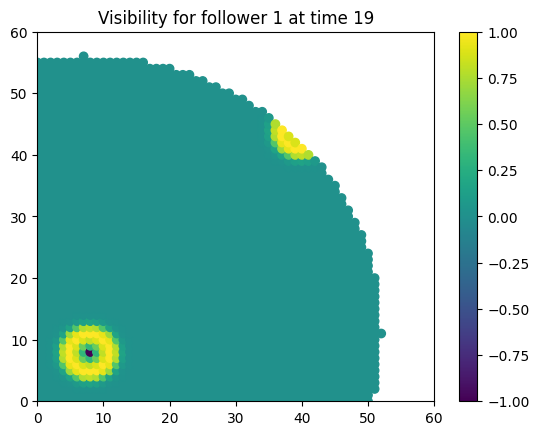

2024-10-29 17:15:32,454 - Generating frame 20/50 


options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2158  40  41  44.598206        33.0        30.0    0.014025        1    20   
288    5   8   3.605551         2.0         3.0    0.992090        1    20   
625   11   8   5.000000         4.0         3.0    0.984808        1    20   
2029  37  44  44.598206        30.0        33.0    0.014025        1    20   
454    8   5   6.082763         1.0         6.0    0.977543        1    20   
460    8  11   1.000000         1.0         0.0    0.999391        1    20   
516    9  11   2.000000         2.0         0.0    0.997564        1    20   
2115  39  41  43.863424        32.0        30.0    0.039664        1    20   
287    5   7   4.472136         2.0         4.0    0.987840        1    20   
289    5   9   2.828427         2.0         2.0    0.995130        1    20   

      proximity  proximity_standardized  
2158   1.000000                6.482556  
288    1.000000                6.482556  
625    

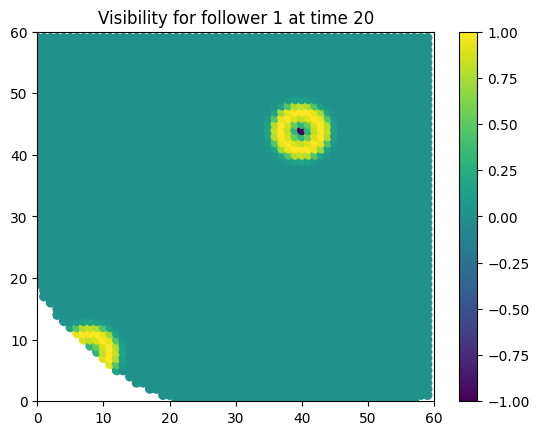

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2096  37  44   3.605551         2.0         3.0    0.992090        1    21   
370    8  11  43.139309        31.0        30.0    0.064905        1    21   
2273  40  41   1.000000         1.0         0.0    0.999391        1    21   
2279  40  47   6.082763         1.0         6.0    0.977543        1    21   
526   11   8  43.278170        28.0        33.0    0.060067        1    21   
2456  43  44   5.000000         4.0         3.0    0.984808        1    21   
2455  43  43   4.472136         4.0         2.0    0.987840        1    21   
319    7  11  43.863424        32.0        30.0    0.039664        1    21   
2339  41  47   6.324555         2.0         6.0    0.975729        1    21   
422    9  11  42.426407        30.0        30.0    0.089715        1    21   

      proximity  proximity_standardized  
2096   1.000000                7.132148  
370    1.000000                7.132148  
2273   

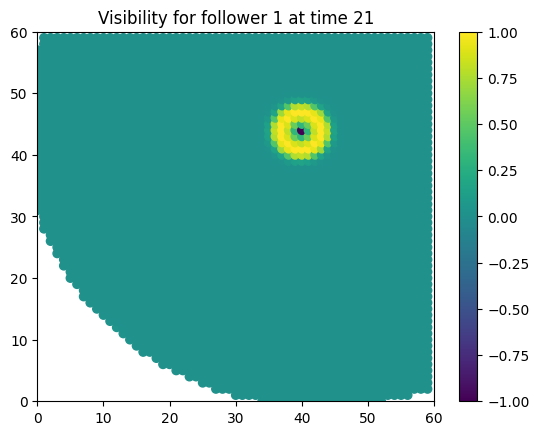

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2083  40  41  4.242641         3.0         3.0    0.989054        1    22   
2266  43  44  0.000000         0.0         0.0    1.000000        1    22   
2089  40  47  4.242641         3.0         3.0    0.989054        1    22   
1906  37  44  6.000000         6.0         0.0    0.978148        1    22   
1907  37  45  6.082763         6.0         1.0    0.977543        1    22   
2023  39  41  5.000000         4.0         3.0    0.984808        1    22   
2265  43  43  1.000000         0.0         1.0    0.999391        1    22   
2149  41  47  3.605551         2.0         3.0    0.992090        1    22   
1905  37  43  6.082763         6.0         1.0    0.977543        1    22   
2143  41  41  3.605551         2.0         3.0    0.992090        1    22   

      proximity  proximity_standardized  
2083   1.000000                 8.35589  
2266   1.000000                 8.35589  
2089   1.000000   

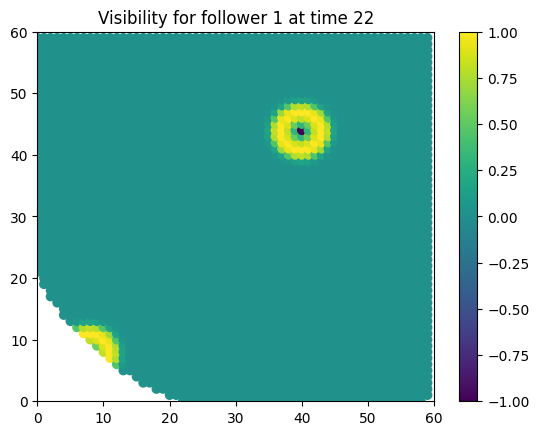

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2258  40  47   6.000000         0.0         6.0    0.978148        1    23   
2075  37  44   4.242641         3.0         3.0    0.989054        1    23   
511   11   8  43.931765        29.0        33.0    0.037280        1    23   
358    8  11  43.863424        32.0        30.0    0.039664        1    23   
2252  40  41   0.000000         0.0         0.0    1.000000        1    23   
2435  43  44   4.242641         3.0         3.0    0.989054        1    23   
2074  37  43   3.605551         3.0         2.0    0.992090        1    23   
2318  41  47   6.082763         1.0         6.0    0.977543        1    23   
2076  37  45   5.000000         3.0         4.0    0.984808        1    23   
409    9  11  43.139309        31.0        30.0    0.064905        1    23   

      proximity  proximity_standardized  
2258   1.000000                7.312501  
2075   1.000000                7.312501  
511    

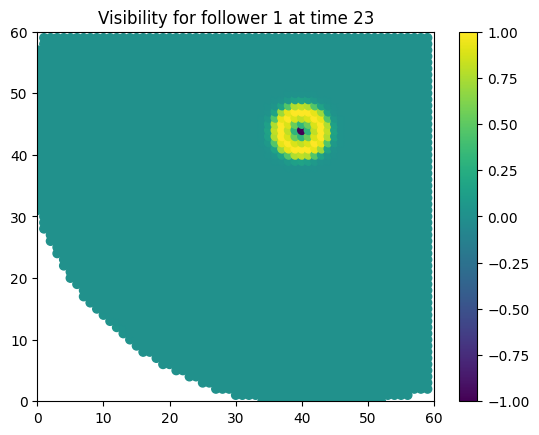

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2083  40  41  4.242641         3.0         3.0    0.989054        1    24   
2266  43  44  0.000000         0.0         0.0    1.000000        1    24   
2089  40  47  4.242641         3.0         3.0    0.989054        1    24   
1906  37  44  6.000000         6.0         0.0    0.978148        1    24   
1907  37  45  6.082763         6.0         1.0    0.977543        1    24   
2023  39  41  5.000000         4.0         3.0    0.984808        1    24   
2265  43  43  1.000000         0.0         1.0    0.999391        1    24   
2149  41  47  3.605551         2.0         3.0    0.992090        1    24   
1905  37  43  6.082763         6.0         1.0    0.977543        1    24   
2143  41  41  3.605551         2.0         3.0    0.992090        1    24   

      proximity  proximity_standardized  
2083   1.000000                 8.35589  
2266   1.000000                 8.35589  
2089   1.000000   

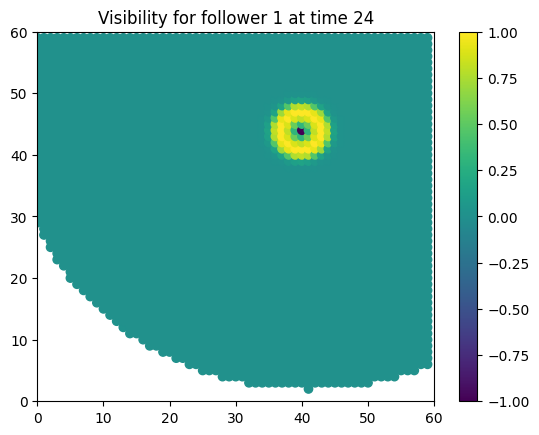

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2196  43  44  3.605551         2.0         3.0    0.992090        1    25   
2021  40  41  6.082763         1.0         6.0    0.977543        1    25   
2027  40  47  1.000000         1.0         0.0    0.999391        1    25   
1853  37  44  5.000000         4.0         3.0    0.984808        1    25   
2085  41  47  0.000000         0.0         0.0    1.000000        1    25   
1852  37  43  5.656854         4.0         4.0    0.980568        1    25   
2195  43  43  4.472136         2.0         4.0    0.987840        1    25   
2079  41  41  6.000000         0.0         6.0    0.978148        1    25   
1854  37  45  4.472136         4.0         2.0    0.987840        1    25   
2197  43  45  2.828427         2.0         2.0    0.995130        1    25   

      proximity  proximity_standardized  
2196   1.000000                8.192045  
2021   1.000000                8.192045  
2027   1.000000   

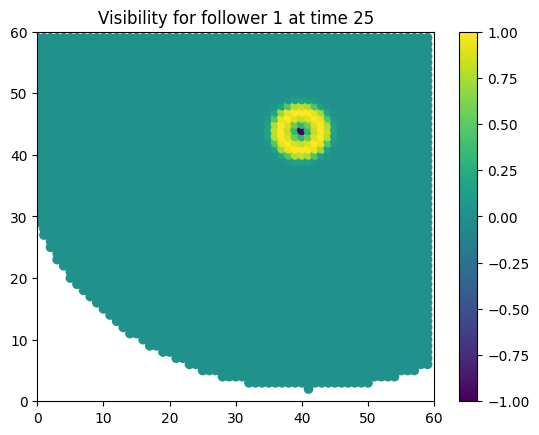

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2196  43  44  3.605551         2.0         3.0    0.992090        1    26   
2021  40  41  6.082763         1.0         6.0    0.977543        1    26   
2027  40  47  1.000000         1.0         0.0    0.999391        1    26   
1853  37  44  5.000000         4.0         3.0    0.984808        1    26   
2085  41  47  0.000000         0.0         0.0    1.000000        1    26   
1852  37  43  5.656854         4.0         4.0    0.980568        1    26   
2195  43  43  4.472136         2.0         4.0    0.987840        1    26   
2079  41  41  6.000000         0.0         6.0    0.978148        1    26   
1854  37  45  4.472136         4.0         2.0    0.987840        1    26   
2197  43  45  2.828427         2.0         2.0    0.995130        1    26   

      proximity  proximity_standardized  
2196   1.000000                8.192045  
2021   1.000000                8.192045  
2027   1.000000   

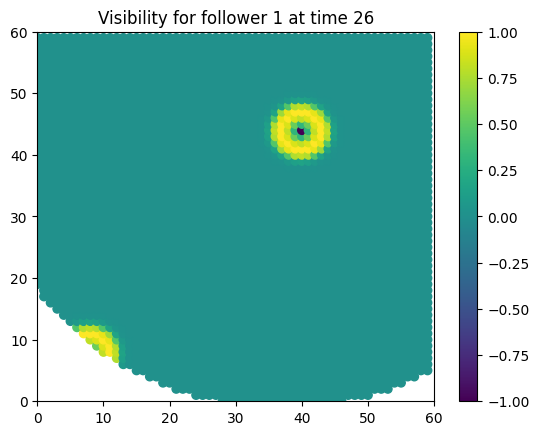

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
516   11   8  44.407207        26.0        36.0    0.020691        1    27   
2242  40  47   4.242641         3.0         3.0    0.989054        1    27   
2419  43  44   6.000000         6.0         0.0    0.978148        1    27   
2059  37  44   0.000000         0.0         0.0    1.000000        1    27   
2236  40  41   4.242641         3.0         3.0    0.989054        1    27   
364    8  11  43.931765        29.0        33.0    0.037280        1    27   
2060  37  45   1.000000         0.0         1.0    0.999391        1    27   
2182  39  47   3.605551         2.0         3.0    0.992090        1    27   
415    9  11  43.278170        28.0        33.0    0.060067        1    27   
2418  43  43   6.082763         6.0         1.0    0.977543        1    27   

      proximity  proximity_standardized  
516    1.000000                7.330378  
2242   1.000000                7.330378  
2419   

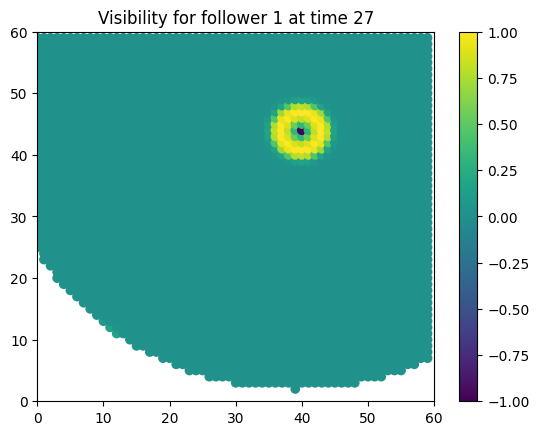

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2072  40  41  6.082763         1.0         6.0    0.977543        1    28   
2078  40  47  1.000000         1.0         0.0    0.999391        1    28   
1903  37  44  3.605551         2.0         3.0    0.992090        1    28   
2246  43  44  5.000000         4.0         3.0    0.984808        1    28   
2129  41  41  6.324555         2.0         6.0    0.975729        1    28   
1902  37  43  4.472136         2.0         4.0    0.987840        1    28   
2247  43  45  4.472136         4.0         2.0    0.987840        1    28   
2245  43  43  5.656854         4.0         4.0    0.980568        1    28   
1904  37  45  2.828427         2.0         2.0    0.995130        1    28   
2135  41  47  2.000000         2.0         0.0    0.997564        1    28   

      proximity  proximity_standardized  
2072   1.000000                8.242881  
2078   1.000000                8.242881  
1903   1.000000   

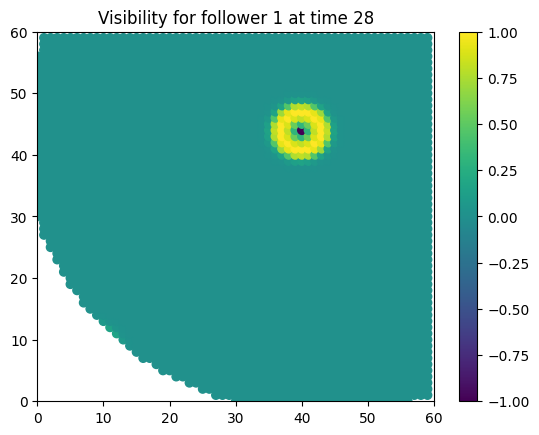

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2116  40  41  3.605551         3.0         2.0    0.992090        1    29   
1939  37  44  6.082763         6.0         1.0    0.977543        1    29   
2299  43  44  1.000000         0.0         1.0    0.999391        1    29   
2122  40  47  5.000000         3.0         4.0    0.984808        1    29   
2056  39  41  4.472136         4.0         2.0    0.987840        1    29   
2062  39  47  5.656854         4.0         4.0    0.980568        1    29   
1940  37  45  6.324555         6.0         2.0    0.975729        1    29   
1938  37  43  6.000000         6.0         0.0    0.978148        1    29   
2176  41  41  2.828427         2.0         2.0    0.995130        1    29   
2298  43  43  0.000000         0.0         0.0    1.000000        1    29   

      proximity  proximity_standardized  
2116   1.000000                8.402727  
1939   1.000000                8.402727  
2299   1.000000   

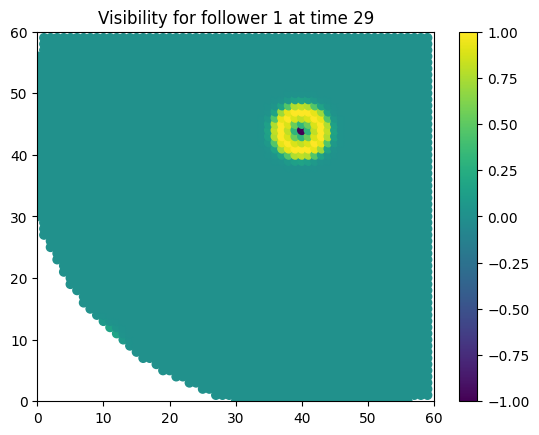

2024-10-29 17:15:37,745 - Generating frame 30/50 


options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2116  40  41  3.605551         3.0         2.0    0.992090        1    30   
1939  37  44  6.082763         6.0         1.0    0.977543        1    30   
2299  43  44  1.000000         0.0         1.0    0.999391        1    30   
2122  40  47  5.000000         3.0         4.0    0.984808        1    30   
2056  39  41  4.472136         4.0         2.0    0.987840        1    30   
2062  39  47  5.656854         4.0         4.0    0.980568        1    30   
1940  37  45  6.324555         6.0         2.0    0.975729        1    30   
1938  37  43  6.000000         6.0         0.0    0.978148        1    30   
2176  41  41  2.828427         2.0         2.0    0.995130        1    30   
2298  43  43  0.000000         0.0         0.0    1.000000        1    30   

      proximity  proximity_standardized  
2116   1.000000                8.402727  
1939   1.000000                8.402727  
2299   1.000000   

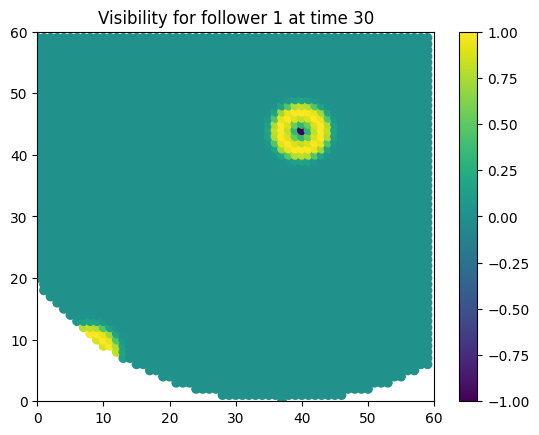

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2376  43  44   6.082763         6.0         1.0    0.977543        1    31   
2022  37  44   1.000000         0.0         1.0    0.999391        1    31   
2202  40  47   3.605551         3.0         2.0    0.992090        1    31   
2196  40  41   5.000000         3.0         4.0    0.984808        1    31   
355    8  11  44.687806        29.0        34.0    0.010897        1    31   
2023  37  45   0.000000         0.0         0.0    1.000000        1    31   
2261  41  47   4.472136         4.0         2.0    0.987840        1    31   
405    9  11  44.045431        28.0        34.0    0.033315        1    31   
2021  37  43   2.000000         0.0         2.0    0.997564        1    31   
2143  39  47   2.828427         2.0         2.0    0.995130        1    31   

      proximity  proximity_standardized  
2376   1.000000                7.543283  
2022   1.000000                7.543283  
2202   

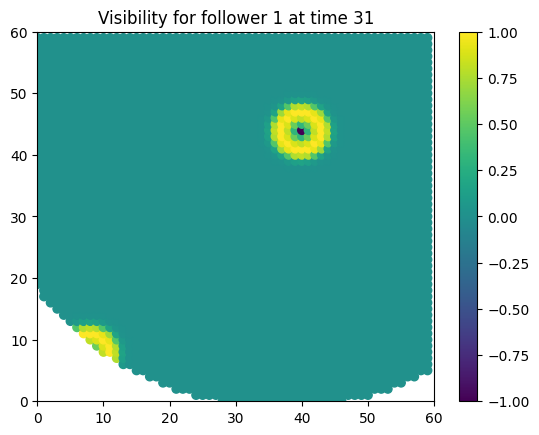

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
516   11   8  44.407207        26.0        36.0    0.020691        1    32   
2242  40  47   4.242641         3.0         3.0    0.989054        1    32   
2419  43  44   6.000000         6.0         0.0    0.978148        1    32   
2059  37  44   0.000000         0.0         0.0    1.000000        1    32   
2236  40  41   4.242641         3.0         3.0    0.989054        1    32   
364    8  11  43.931765        29.0        33.0    0.037280        1    32   
2060  37  45   1.000000         0.0         1.0    0.999391        1    32   
2182  39  47   3.605551         2.0         3.0    0.992090        1    32   
415    9  11  43.278170        28.0        33.0    0.060067        1    32   
2418  43  43   6.082763         6.0         1.0    0.977543        1    32   

      proximity  proximity_standardized  
516    1.000000                7.330378  
2242   1.000000                7.330378  
2419   

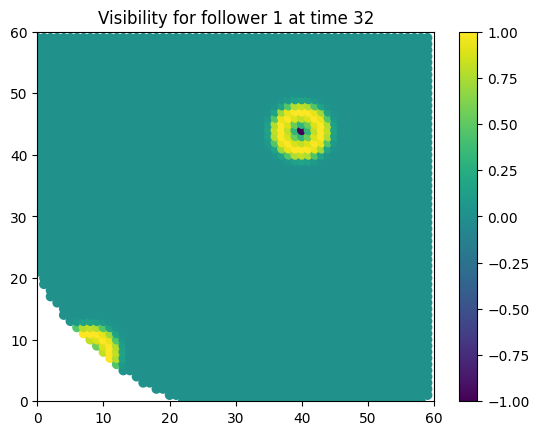

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2258  40  47   6.000000         0.0         6.0    0.978148        1    33   
2075  37  44   4.242641         3.0         3.0    0.989054        1    33   
511   11   8  43.931765        29.0        33.0    0.037280        1    33   
358    8  11  43.863424        32.0        30.0    0.039664        1    33   
2252  40  41   0.000000         0.0         0.0    1.000000        1    33   
2435  43  44   4.242641         3.0         3.0    0.989054        1    33   
2074  37  43   3.605551         3.0         2.0    0.992090        1    33   
2318  41  47   6.082763         1.0         6.0    0.977543        1    33   
2076  37  45   5.000000         3.0         4.0    0.984808        1    33   
409    9  11  43.139309        31.0        30.0    0.064905        1    33   

      proximity  proximity_standardized  
2258   1.000000                7.312501  
2075   1.000000                7.312501  
511    

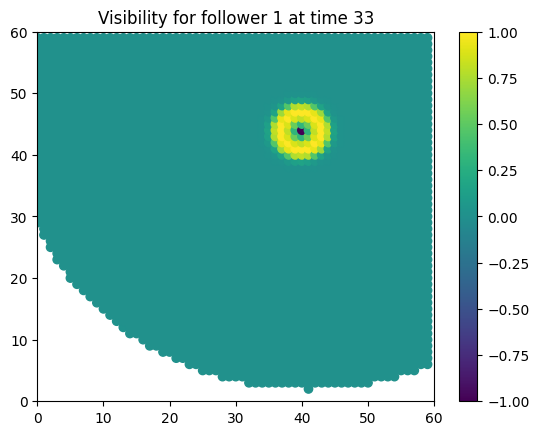

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2196  43  44  3.605551         2.0         3.0    0.992090        1    34   
2021  40  41  6.082763         1.0         6.0    0.977543        1    34   
2027  40  47  1.000000         1.0         0.0    0.999391        1    34   
1853  37  44  5.000000         4.0         3.0    0.984808        1    34   
2085  41  47  0.000000         0.0         0.0    1.000000        1    34   
1852  37  43  5.656854         4.0         4.0    0.980568        1    34   
2195  43  43  4.472136         2.0         4.0    0.987840        1    34   
2079  41  41  6.000000         0.0         6.0    0.978148        1    34   
1854  37  45  4.472136         4.0         2.0    0.987840        1    34   
2197  43  45  2.828427         2.0         2.0    0.995130        1    34   

      proximity  proximity_standardized  
2196   1.000000                8.192045  
2021   1.000000                8.192045  
2027   1.000000   

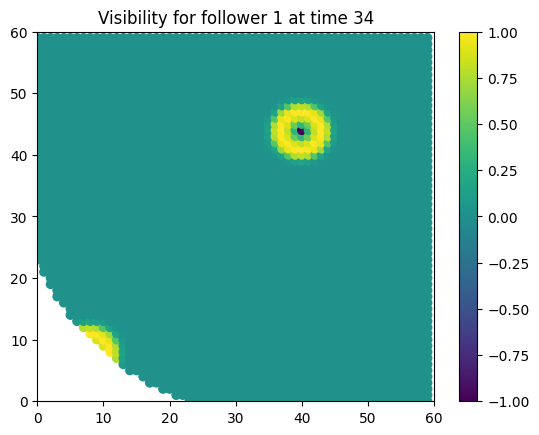

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
495   11   8  44.598206        30.0        33.0    0.014025        1    35   
2052  37  44   5.000000         4.0         3.0    0.984808        1    35   
2235  40  47   6.082763         1.0         6.0    0.977543        1    35   
2229  40  41   1.000000         1.0         0.0    0.999391        1    35   
345    8  11  44.598206        33.0        30.0    0.014025        1    35   
2412  43  44   3.605551         2.0         3.0    0.992090        1    35   
496   11   9  43.863424        30.0        32.0    0.039664        1    35   
2169  39  41   2.000000         2.0         0.0    0.997564        1    35   
2295  41  47   6.000000         0.0         6.0    0.978148        1    35   
2289  41  41   0.000000         0.0         0.0    1.000000        1    35   

      proximity  proximity_standardized  
495    1.000000                7.536805  
2052   1.000000                7.536805  
2235   

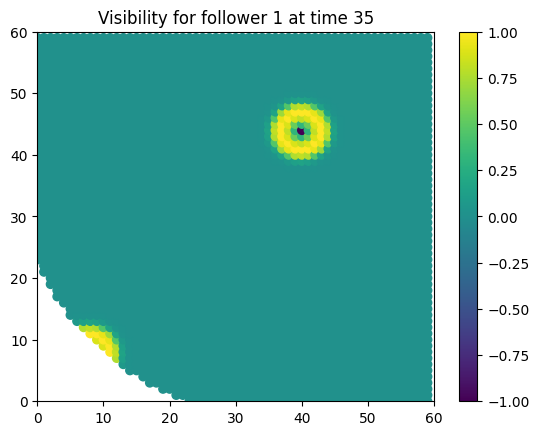

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
495   11   8  44.598206        30.0        33.0    0.014025        1    36   
2052  37  44   5.000000         4.0         3.0    0.984808        1    36   
2235  40  47   6.082763         1.0         6.0    0.977543        1    36   
2229  40  41   1.000000         1.0         0.0    0.999391        1    36   
345    8  11  44.598206        33.0        30.0    0.014025        1    36   
2412  43  44   3.605551         2.0         3.0    0.992090        1    36   
496   11   9  43.863424        30.0        32.0    0.039664        1    36   
2169  39  41   2.000000         2.0         0.0    0.997564        1    36   
2295  41  47   6.000000         0.0         6.0    0.978148        1    36   
2289  41  41   0.000000         0.0         0.0    1.000000        1    36   

      proximity  proximity_standardized  
495    1.000000                7.536805  
2052   1.000000                7.536805  
2235   

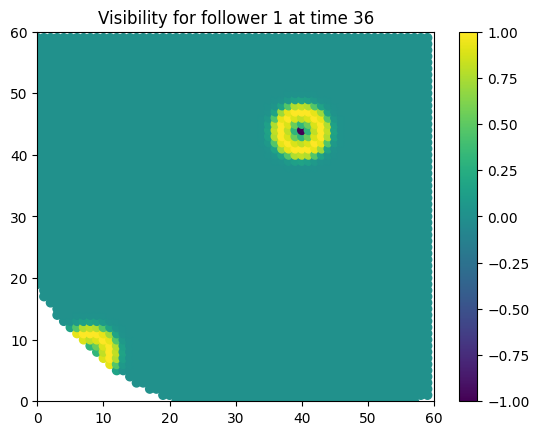

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2096  37  44   3.605551         2.0         3.0    0.992090        1    37   
370    8  11  43.139309        31.0        30.0    0.064905        1    37   
2273  40  41   1.000000         1.0         0.0    0.999391        1    37   
2279  40  47   6.082763         1.0         6.0    0.977543        1    37   
526   11   8  43.278170        28.0        33.0    0.060067        1    37   
2456  43  44   5.000000         4.0         3.0    0.984808        1    37   
2455  43  43   4.472136         4.0         2.0    0.987840        1    37   
319    7  11  43.863424        32.0        30.0    0.039664        1    37   
2339  41  47   6.324555         2.0         6.0    0.975729        1    37   
422    9  11  42.426407        30.0        30.0    0.089715        1    37   

      proximity  proximity_standardized  
2096   1.000000                7.132148  
370    1.000000                7.132148  
2273   

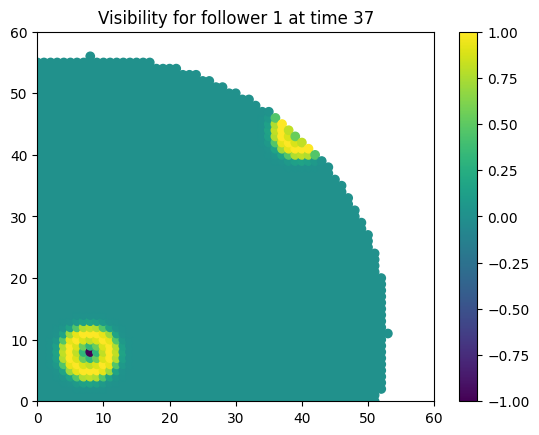

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2171  40  41  43.863424        32.0        30.0    0.039664        1    38   
2039  37  44  43.931765        29.0        33.0    0.037280        1    38   
459    8  11   0.000000         0.0         0.0    1.000000        1    38   
288    5   8   4.242641         3.0         3.0    0.989054        1    38   
453    8   5   6.000000         0.0         6.0    0.978148        1    38   
625   11   8   4.242641         3.0         3.0    0.989054        1    38   
2214  41  41  44.598206        33.0        30.0    0.014025        1    38   
516    9  11   1.000000         1.0         0.0    0.999391        1    38   
626   11   9   3.605551         3.0         2.0    0.992090        1    38   
624   11   7   5.000000         3.0         4.0    0.984808        1    38   

      proximity  proximity_standardized  
2171   1.000000                6.338631  
2039   1.000000                6.338631  
459    

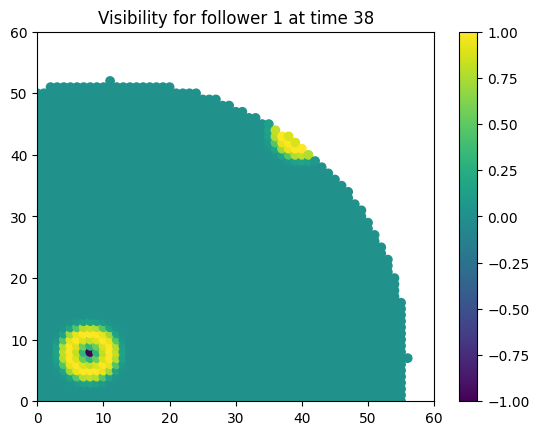

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
419    8   5   3.605551         3.0         2.0    0.992090        1    39   
266    5   8   6.082763         6.0         1.0    0.977543        1    39   
425    8  11   5.000000         3.0         4.0    0.984808        1    39   
2042  40  41  44.687806        29.0        34.0    0.010897        1    39   
578   11   8   1.000000         0.0         1.0    0.999391        1    39   
265    5   7   6.000000         6.0         0.0    0.978148        1    39   
471    9   5   2.828427         2.0         2.0    0.995130        1    39   
477    9  11   4.472136         2.0         4.0    0.987840        1    39   
367    7   5   4.472136         4.0         2.0    0.987840        1    39   
1999  39  41  44.045431        28.0        34.0    0.033315        1    39   

      proximity  proximity_standardized  
419    1.000000                6.574006  
266    1.000000                6.574006  
425    

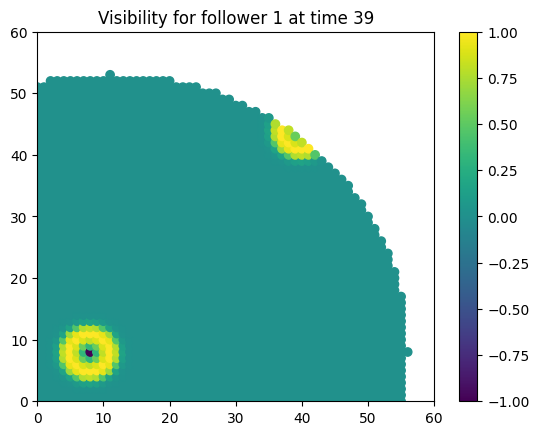

2024-10-29 17:15:43,682 - Generating frame 40/50 


options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
427    8   5   4.242641         3.0         3.0    0.989054        1    40   
2082  40  41  43.931765        29.0        33.0    0.037280        1    40   
589   11   8   0.000000         0.0         0.0    1.000000        1    40   
1951  37  44  44.407207        26.0        36.0    0.020691        1    40   
433    8  11   4.242641         3.0         3.0    0.989054        1    40   
271    5   8   6.000000         6.0         0.0    0.978148        1    40   
2125  41  41  44.598206        30.0        33.0    0.014025        1    40   
272    5   9   6.082763         6.0         1.0    0.977543        1    40   
486    9  11   3.605551         2.0         3.0    0.992090        1    40   
380    7  11   5.000000         4.0         3.0    0.984808        1    40   

      proximity  proximity_standardized  
427    1.000000                6.401444  
2082   1.000000                6.401444  
589    

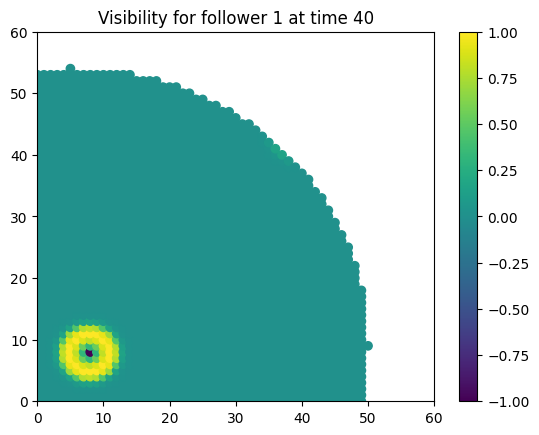

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
438   8   5  5.000000         3.0         4.0    0.984808        1    41   
444   8  11  3.605551         3.0         2.0    0.992090        1    41   
603  11   8  6.082763         6.0         1.0    0.977543        1    41   
278   5   8  1.000000         0.0         1.0    0.999391        1    41   
279   5   9  0.000000         0.0         0.0    1.000000        1    41   
277   5   7  2.000000         0.0         2.0    0.997564        1    41   
498   9  11  4.472136         4.0         2.0    0.987840        1    41   
492   9   5  5.656854         4.0         4.0    0.980568        1    41   
390   7  11  2.828427         2.0         2.0    0.995130        1    41   
384   7   5  4.472136         2.0         4.0    0.987840        1    41   

     proximity  proximity_standardized  
438   1.000000                7.041848  
444   1.000000                7.041848  
603   1.000000                7.

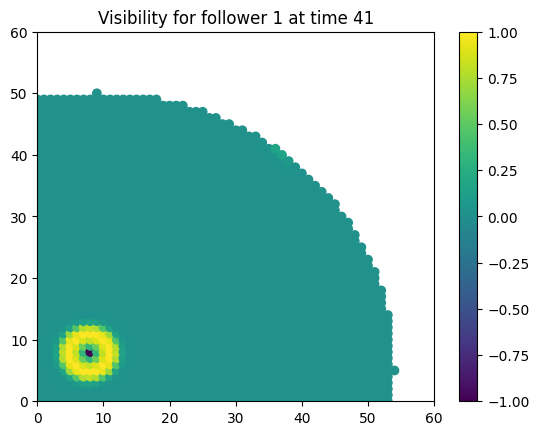

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
411   8  11  6.082763         1.0         6.0    0.977543        1    42   
405   8   5  1.000000         1.0         0.0    0.999391        1    42   
258   5   8  5.000000         4.0         3.0    0.984808        1    42   
559  11   8  3.605551         2.0         3.0    0.992090        1    42   
461   9  11  6.000000         0.0         6.0    0.978148        1    42   
355   7   5  2.000000         2.0         0.0    0.997564        1    42   
361   7  11  6.324555         2.0         6.0    0.975729        1    42   
558  11   7  2.828427         2.0         2.0    0.995130        1    42   
560  11   9  4.472136         2.0         4.0    0.987840        1    42   
455   9   5  0.000000         0.0         0.0    1.000000        1    42   

     proximity  proximity_standardized  
411   1.000000                7.042224  
405   1.000000                7.042224  
258   1.000000                7.

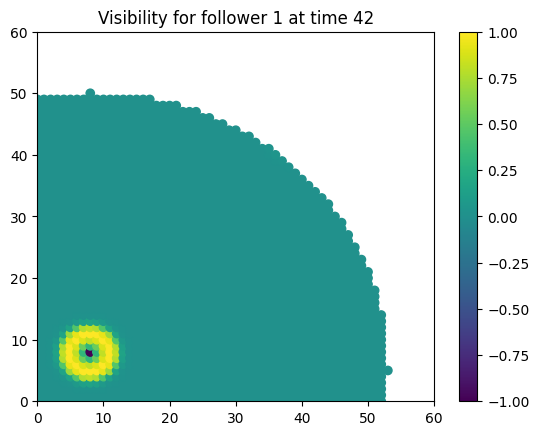

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
258   5   8  4.242641         3.0         3.0    0.989054        1    43   
405   8   5  0.000000         0.0         0.0    1.000000        1    43   
559  11   8  4.242641         3.0         3.0    0.989054        1    43   
411   8  11  6.000000         0.0         6.0    0.978148        1    43   
361   7  11  6.082763         1.0         6.0    0.977543        1    43   
558  11   7  3.605551         3.0         2.0    0.992090        1    43   
257   5   7  3.605551         3.0         2.0    0.992090        1    43   
456   9   5  1.000000         1.0         0.0    0.999391        1    43   
259   5   9  5.000000         3.0         4.0    0.984808        1    43   
462   9  11  6.082763         1.0         6.0    0.977543        1    43   

     proximity  proximity_standardized  
258   1.000000                6.968179  
405   1.000000                6.968179  
559   1.000000                6.

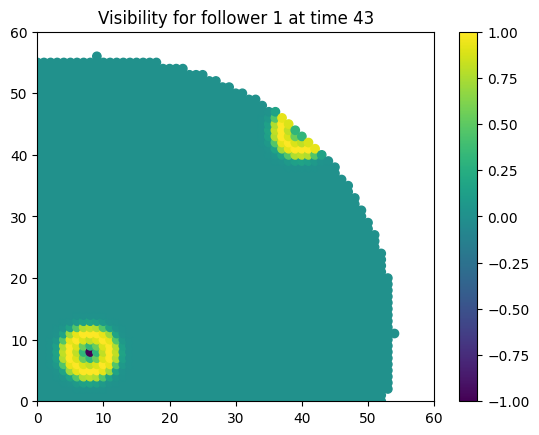

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
453    8   5   6.082763         1.0         6.0    0.977543        1    44   
2048  37  44  43.278170        28.0        33.0    0.060067        1    44   
288    5   8   5.000000         4.0         3.0    0.984808        1    44   
2183  40  41  43.139309        31.0        30.0    0.064905        1    44   
625   11   8   3.605551         2.0         3.0    0.992090        1    44   
459    8  11   1.000000         1.0         0.0    0.999391        1    44   
509    9   5   6.000000         0.0         6.0    0.978148        1    44   
2047  37  43  42.520583        28.0        32.0    0.086440        1    44   
2049  37  45  44.045431        28.0        34.0    0.033315        1    44   
403    7  11   2.000000         2.0         0.0    0.997564        1    44   

      proximity  proximity_standardized  
453    1.000000                6.231189  
2048   1.000000                6.231189  
288    

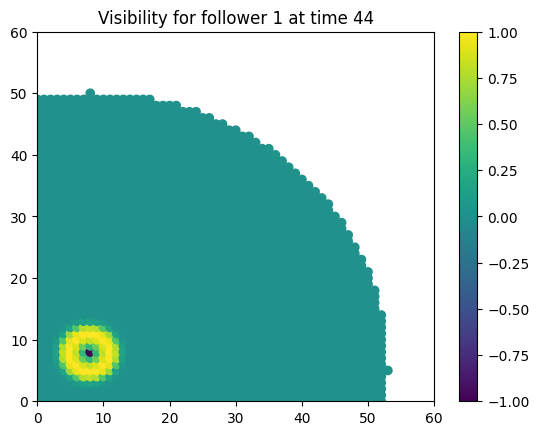

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
258   5   8  4.242641         3.0         3.0    0.989054        1    45   
405   8   5  0.000000         0.0         0.0    1.000000        1    45   
559  11   8  4.242641         3.0         3.0    0.989054        1    45   
411   8  11  6.000000         0.0         6.0    0.978148        1    45   
361   7  11  6.082763         1.0         6.0    0.977543        1    45   
558  11   7  3.605551         3.0         2.0    0.992090        1    45   
257   5   7  3.605551         3.0         2.0    0.992090        1    45   
456   9   5  1.000000         1.0         0.0    0.999391        1    45   
259   5   9  5.000000         3.0         4.0    0.984808        1    45   
462   9  11  6.082763         1.0         6.0    0.977543        1    45   

     proximity  proximity_standardized  
258   1.000000                6.968179  
405   1.000000                6.968179  
559   1.000000                6.

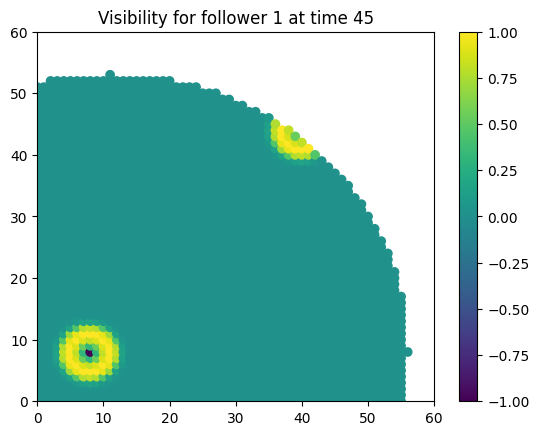

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
427    8   5   4.242641         3.0         3.0    0.989054        1    46   
2082  40  41  43.931765        29.0        33.0    0.037280        1    46   
589   11   8   0.000000         0.0         0.0    1.000000        1    46   
1951  37  44  44.407207        26.0        36.0    0.020691        1    46   
433    8  11   4.242641         3.0         3.0    0.989054        1    46   
271    5   8   6.000000         6.0         0.0    0.978148        1    46   
2125  41  41  44.598206        30.0        33.0    0.014025        1    46   
272    5   9   6.082763         6.0         1.0    0.977543        1    46   
486    9  11   3.605551         2.0         3.0    0.992090        1    46   
380    7  11   5.000000         4.0         3.0    0.984808        1    46   

      proximity  proximity_standardized  
427    1.000000                6.401444  
2082   1.000000                6.401444  
589    

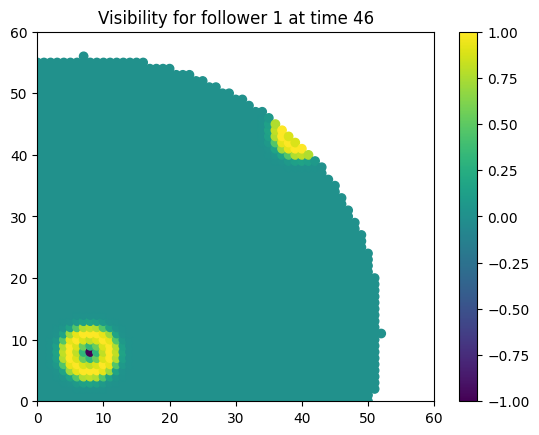

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2158  40  41  44.598206        33.0        30.0    0.014025        1    47   
288    5   8   3.605551         2.0         3.0    0.992090        1    47   
625   11   8   5.000000         4.0         3.0    0.984808        1    47   
2029  37  44  44.598206        30.0        33.0    0.014025        1    47   
454    8   5   6.082763         1.0         6.0    0.977543        1    47   
460    8  11   1.000000         1.0         0.0    0.999391        1    47   
516    9  11   2.000000         2.0         0.0    0.997564        1    47   
2115  39  41  43.863424        32.0        30.0    0.039664        1    47   
287    5   7   4.472136         2.0         4.0    0.987840        1    47   
289    5   9   2.828427         2.0         2.0    0.995130        1    47   

      proximity  proximity_standardized  
2158   1.000000                6.482556  
288    1.000000                6.482556  
625    

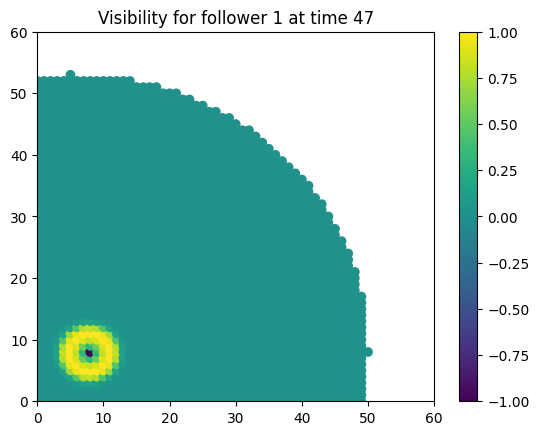

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
592  11   8  6.000000         6.0         0.0    0.978148        1    48   
436   8  11  4.242641         3.0         3.0    0.989054        1    48   
430   8   5  4.242641         3.0         3.0    0.989054        1    48   
273   5   8  0.000000         0.0         0.0    1.000000        1    48   
383   7  11  3.605551         2.0         3.0    0.992090        1    48   
377   7   5  3.605551         2.0         3.0    0.992090        1    48   
591  11   7  6.082763         6.0         1.0    0.977543        1    48   
483   9   5  5.000000         4.0         3.0    0.984808        1    48   
272   5   7  1.000000         0.0         1.0    0.999391        1    48   
274   5   9  1.000000         0.0         1.0    0.999391        1    48   

     proximity  proximity_standardized  
592   1.000000                6.968180  
436   1.000000                6.968180  
430   1.000000                6.

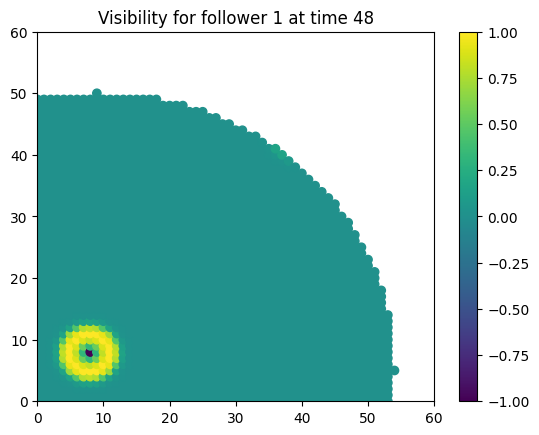

options       x   y  distance  distance_x  distance_y  visibility  forager  time  \
411   8  11  6.082763         1.0         6.0    0.977543        1    49   
405   8   5  1.000000         1.0         0.0    0.999391        1    49   
258   5   8  5.000000         4.0         3.0    0.984808        1    49   
559  11   8  3.605551         2.0         3.0    0.992090        1    49   
461   9  11  6.000000         0.0         6.0    0.978148        1    49   
355   7   5  2.000000         2.0         0.0    0.997564        1    49   
361   7  11  6.324555         2.0         6.0    0.975729        1    49   
558  11   7  2.828427         2.0         2.0    0.995130        1    49   
560  11   9  4.472136         2.0         4.0    0.987840        1    49   
455   9   5  0.000000         0.0         0.0    1.000000        1    49   

     proximity  proximity_standardized  
411   1.000000                7.042224  
405   1.000000                7.042224  
258   1.000000                7.

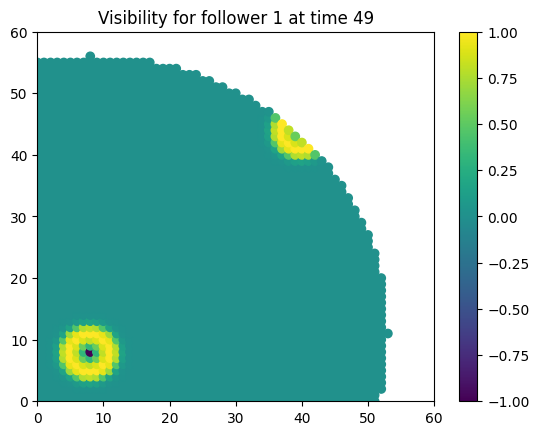

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2171  40  41  43.863424        32.0        30.0    0.039664        1    50   
2039  37  44  43.931765        29.0        33.0    0.037280        1    50   
459    8  11   0.000000         0.0         0.0    1.000000        1    50   
288    5   8   4.242641         3.0         3.0    0.989054        1    50   
453    8   5   6.000000         0.0         6.0    0.978148        1    50   
625   11   8   4.242641         3.0         3.0    0.989054        1    50   
2214  41  41  44.598206        33.0        30.0    0.014025        1    50   
516    9  11   1.000000         1.0         0.0    0.999391        1    50   
626   11   9   3.605551         3.0         2.0    0.992090        1    50   
624   11   7   5.000000         3.0         4.0    0.984808        1    50   

      proximity  proximity_standardized  
2171   1.000000                6.338631  
2039   1.000000                6.338631  
459    

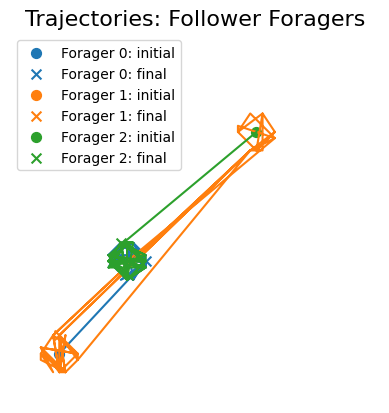

In [6]:
random.seed(23)
np.random.seed(23)

# create a new empty simulation (a starting point for the actual simulation)
grid_size = 60
follower_sim = rhf.Foragers(
    grid_size=grid_size,
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=30,
    grab_range=3,
)

# run the simulation: this places the rewards on the grid
follower_sim()

# add the followers to the simulation and run simulation forward
follower_sim = rhf.add_follower_foragers(
    follower_sim,
    num_follower_foragers=3,
    visibility_range=45,
    getting_worse=.5,
    optimal=3,
    proximity_decay=2,
    initial_positions=np.array([[10, 10], [20, 20], [40, 40]]),
)

# display(follower_sim.foragersDF)
ax = ft.plot_trajectories(follower_sim.foragersDF, "Follower Foragers")
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
plt.show()

Unsurprisingly, all the foragers tend to stay close to each other and do not explore the environment.

In [8]:

# filter to time between 15 and 18
filtered_df = follower_sim.foragersDF[
    (follower_sim.foragersDF["time"] >= 13) & (follower_sim.foragersDF["time"] <= 20)
]

filtered_df



x     y  time  forager      type
13  16.0  22.0    13        0  follower
14  18.0  26.0    14        0  follower
15  16.0  24.0    15        0  follower
16  19.0  20.0    16        0  follower
17  16.0  24.0    17        0  follower
18  20.0  26.0    18        0  follower
19  22.0  23.0    19        0  follower
20  22.0  22.0    20        0  follower
13   7.0   5.0    13        1  follower
14   5.0   8.0    14        1  follower
15   5.0   7.0    15        1  follower
16   9.0   5.0    16        1  follower
17  11.0   7.0    17        1  follower
18  39.0  41.0    18        1  follower
19   7.0  11.0    19        1  follower
20  39.0  41.0    20        1  follower
13  22.0  23.0    13        2  follower
14  19.0  20.0    14        2  follower
15  22.0  22.0    15        2  follower
16  16.0  24.0    16        2  follower
17  22.0  22.0    17        2  follower
18  16.0  22.0    18        2  follower
19  19.0  26.0    19        2  follower
20  22.0  22.0    20        2  follower

In [4]:
ft.animate_foragers(
    follower_sim, width=600, height=400, plot_rewards=True, point_size=6,
    autosize=True
)

## Derived quantities

In [6]:
# We'll use `proximity`, `food` and `access` predictors

local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": follower_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food": {
        "decay_factor": 0.5,
    },
    "access": {
        "decay_factor": 0.2,
    },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_hungry = ft.derive_predictors_and_scores(
    follower_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

# display(derivedDF_hungry)

2024-10-28 17:07:07,285 - proximity completed in 0.59 seconds.
2024-10-28 17:07:10,007 - food completed in 2.72 seconds.
2024-10-28 17:07:10,229 - access completed in 0.22 seconds.
2024-10-28 17:07:10,410 - nextStep_linear completed in 0.18 seconds.
2024-10-28 17:07:10,580 - nextStep_sublinear completed in 0.17 seconds.
/home/rafal/s78projects/collab-creatures/collab/foraging/toolkit/derive.py:56: UserWarning:


                      Dropped 951/47519 frames from `derivedDF` due to NaN values.
                      Missing values can arise when computations depend on next/previous step positions
                      that are unavailable. See documentation of the corresponding predictor/score generating
                      functions for more information.
                      



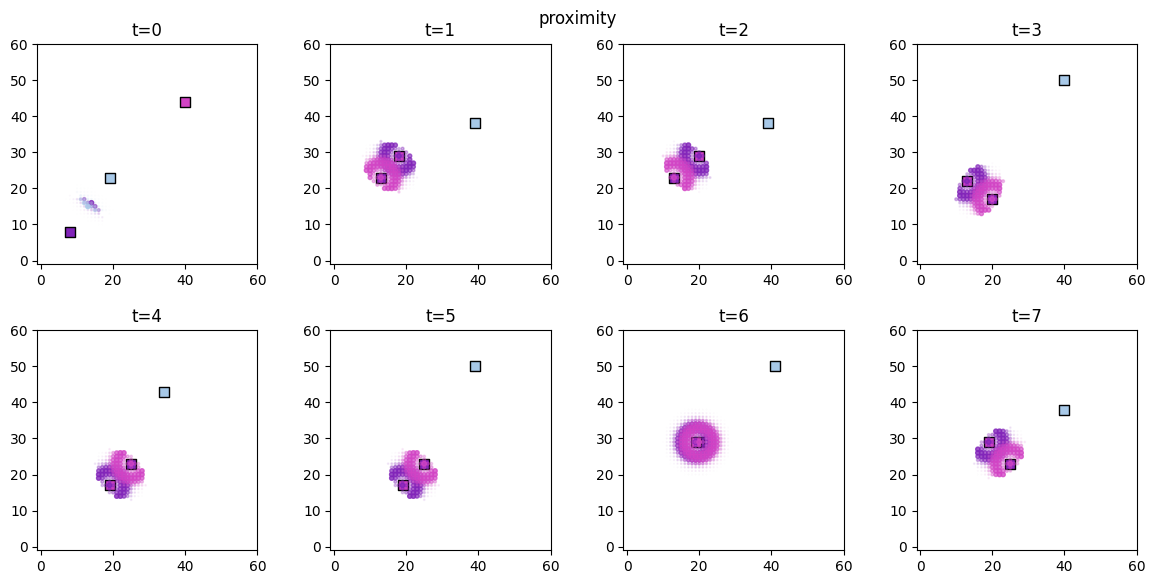

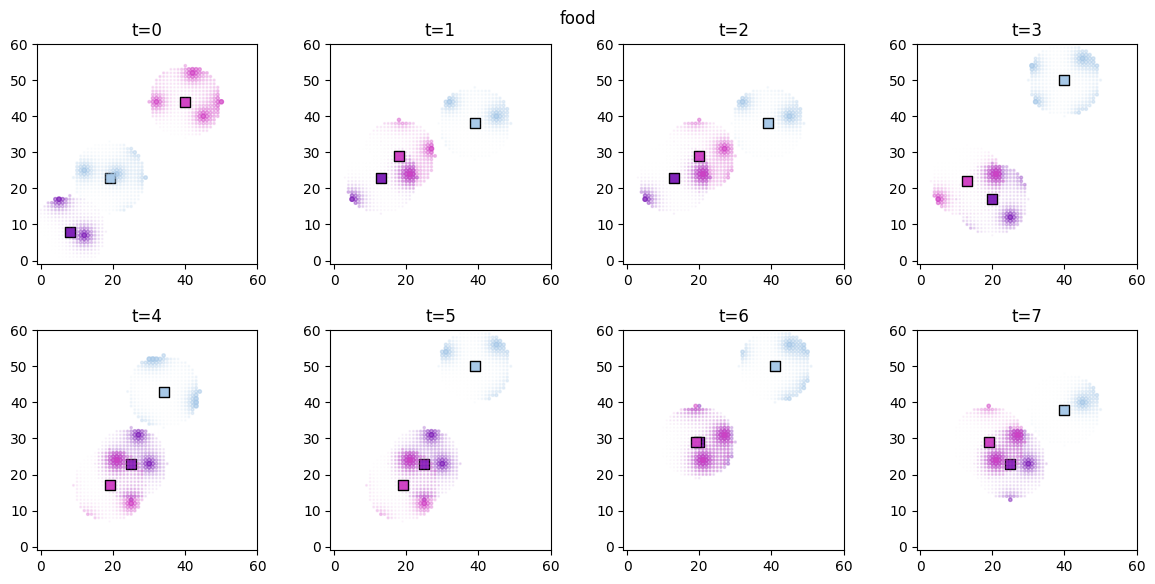

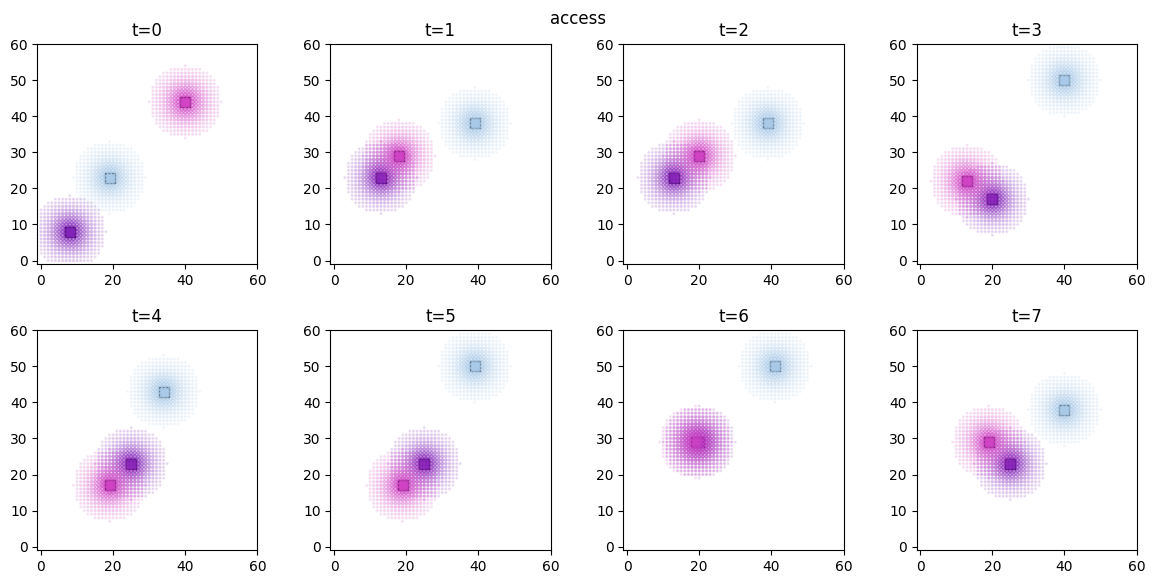

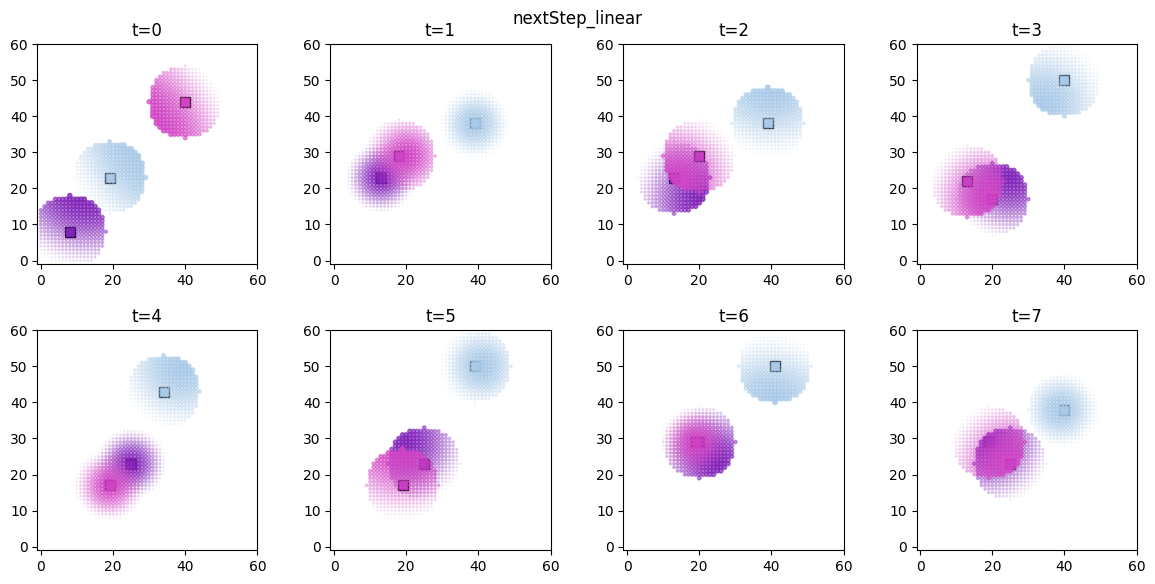

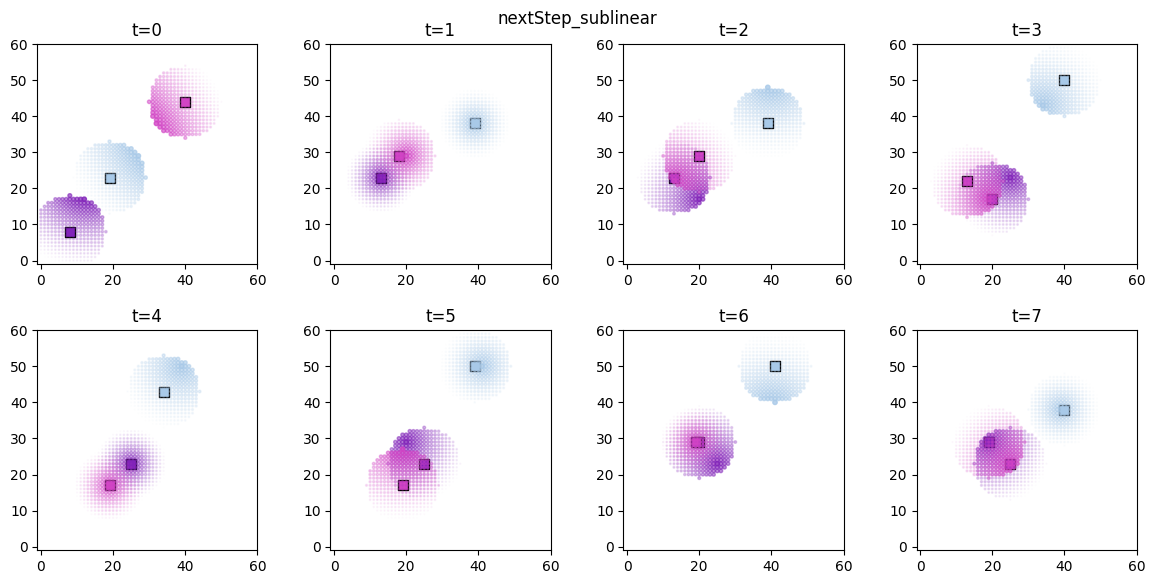

In [7]:
# visualize the spatial distributions of the derived quantities for each forager

for derived_quantity_name in follower_sim.derived_quantities.keys():
    ft.plot_predictor(
        follower_sim.foragers,
        follower_sim.derived_quantities[derived_quantity_name],
        predictor_name=derived_quantity_name,
        time=range(min(8, num_frames)),
        grid_size=grid_size,
        size_multiplier=10,
        random_state=99,
        forager_position_indices=[0, 1, 2],
        forager_predictor_indices=[0, 1, 2],
    )
    plt.suptitle(derived_quantity_name)
    plt.show()

## Inference

2024-10-28 15:41:56,833 - Sample size: 46579
2024-10-28 15:41:56,834 - Starting SVI inference with 1500 iterations.


[iteration 0001] loss: 171636.7500
[iteration 0200] loss: 118194.7422
[iteration 0400] loss: 117138.3047
[iteration 0600] loss: 116770.8984
[iteration 0800] loss: 116844.3672
[iteration 1000] loss: 116756.9297
[iteration 1200] loss: 116830.6797
[iteration 1400] loss: 116767.6172


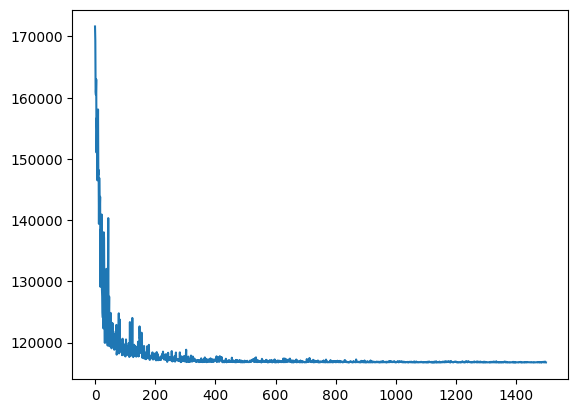

2024-10-28 15:42:06,200 - SVI inference completed in 9.37 seconds.


Coefficient marginals:
Site: weight_continuous_proximity_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0  0.196394  0.015694  0.170974  0.186028  0.196538  0.206734  0.221458 

Site: weight_continuous_food_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0 -0.116813  0.013537 -0.137824 -0.126386 -0.116534 -0.107433 -0.095386 

Site: weight_continuous_access_scaled_nextStep_sublinear
       mean       std        5%       25%      50%       75%       95%
0  0.404285  0.014196  0.381239  0.394556  0.40416  0.414433  0.426971 



In [6]:
# prepare the training data

predictors = ["proximity_scaled", "food_scaled", "access_scaled"]
outcome_vars = ["nextStep_sublinear"]


predictor_tensors_follower, outcome_tensor_follower = ft.prep_data_for_inference(
    follower_sim, predictors, outcome_vars
)

# construct Pyro model
model_sigmavar_follower = ft.HeteroskedasticLinear(
    predictor_tensors_follower, outcome_tensor_follower
)

# runs SVI to approximate the posterior and samples from it
results_follower = ft.get_samples(
    model=model_sigmavar_follower,
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_svi_iters=1500,
    num_samples=1000,
)

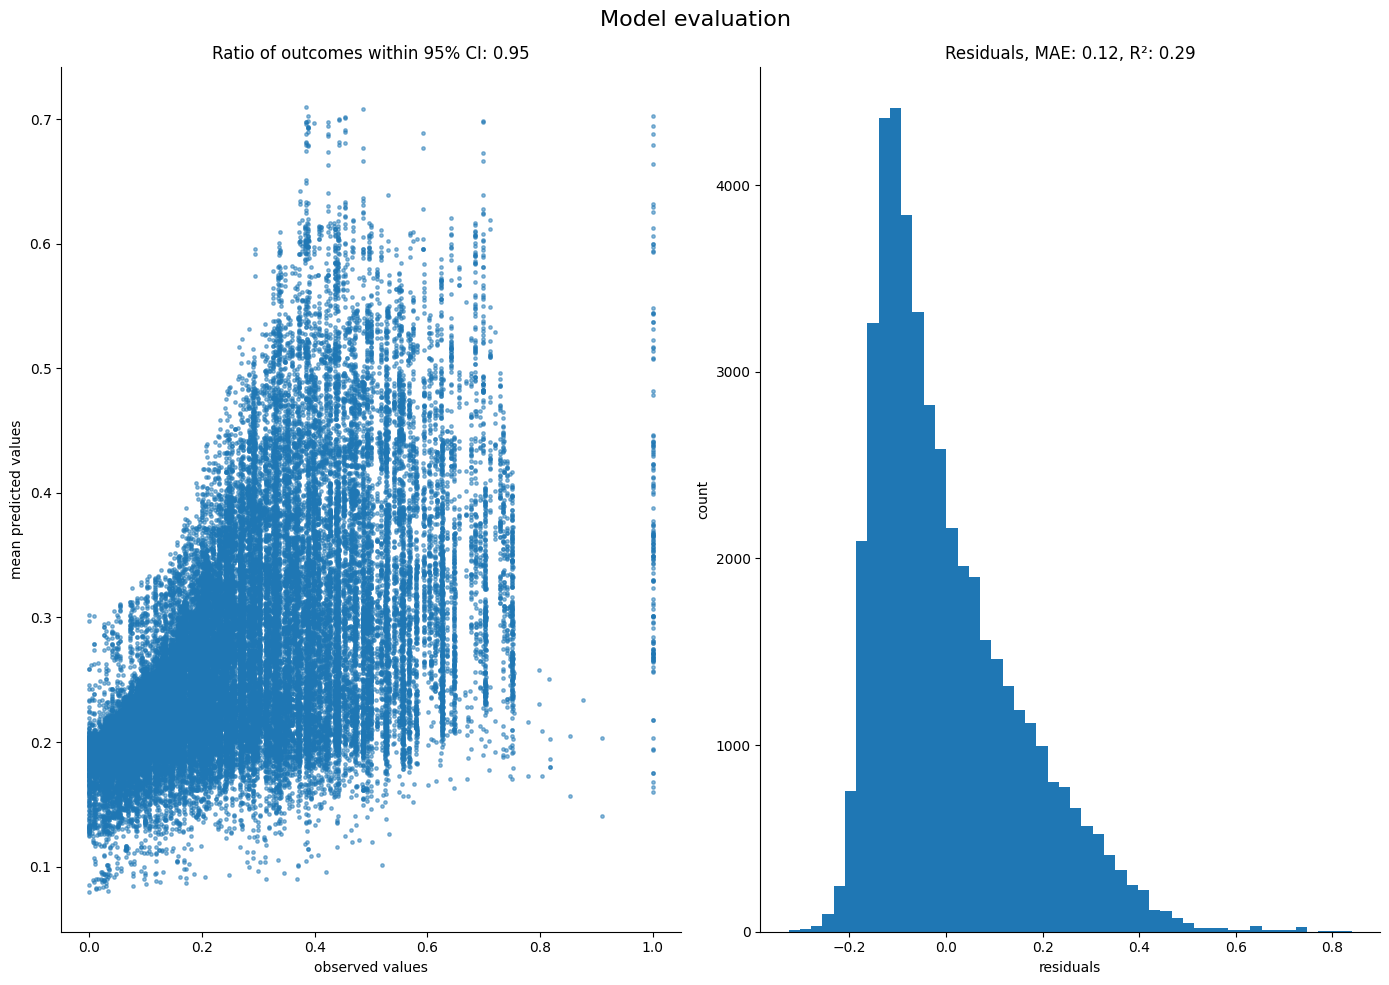

In [7]:
selected_sites = [
    key
    for key in results_follower["samples"].keys()
    if key.startswith("weight") and not key.endswith("sigma")
]
selected_samples = {key: results_follower["samples"][key] for key in selected_sites}

ft.plot_coefs(
    selected_samples, "Follower foragers", nbins=120, ann_start_y=160, ann_break_y=50
)

# save the samples for future use
if not os.path.exists("sim_data/follower_foragers_samples.dill"):
    with open(os.path.join("sim_data", "follower_foragers_samples.dill"), "wb") as f:
        dill.dump(selected_samples, f)

ft.evaluate_performance(
    model=model_sigmavar_follower,
    guide=results_follower["guide"],
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_samples=1000,
)

As expected, both `access` and `proximity` are now significant in explaining the agent movements, while `food` has no effect.